In [2]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
avg_10min_data_path = "../data/hiratsuka/avg_10min"
year = 2017

data_path = "{0}/{1}".format(avg_10min_data_path, year)

vel_avg = []
for month in range(7, 8 + 1):
    for day in range(1, 31 + 1):
        file_name = "{0}{1:02d}{2:02d}.csv".format(year, month, day)
        file_dath = "{0}/{1}".format(data_path, file_name)

        data = np.genfromtxt(file_dath, delimiter=",", dtype='float')
        vel_avg.extend(data[:, 1])

data_hiratsuka = pd.DataFrame(columns=["time", "vel"])
data_hiratsuka["time"] = pd.date_range('2017-07-01 00:00:00', periods=8928 ,freq='10min')
data_hiratsuka["vel"] = vel_avg
data_hiratsuka

,time,vel
0,2017-07-01 00:00:00,9.477233
1,2017-07-01 00:10:00,8.086633
2,2017-07-01 00:20:00,6.797517
3,2017-07-01 00:30:00,8.036333
4,2017-07-01 00:40:00,8.047033
5,2017-07-01 00:50:00,6.125383
6,2017-07-01 01:00:00,7.081250
7,2017-07-01 01:10:00,9.013583
8,2017-07-01 01:20:00,8.669383
9,2017-07-01 01:30:00,7.996767


In [4]:
def get_vel_data(year, lon, lat):
    csv_dir_path="../data/csv"
    file_path="{0}/{1}/{2}".format(csv_dir_path, lon, lat)

    ugrd_file_name="{0}/{1}_{2}_UGRD_{3}.csv".format(file_path, lon, lat, year)
    vgrd_file_name="{0}/{1}_{2}_VGRD_{3}.csv".format(file_path, lon, lat, year)

    ugrd_data = np.genfromtxt(ugrd_file_name, delimiter=",", dtype='float')
    vgrd_data = np.genfromtxt(vgrd_file_name, delimiter=",", dtype='float')

    return (ugrd_data[:,1]**2 + vgrd_data[:, 1]**2)**0.5

year = 2017
lons=["139.3125", "139.3750"]
lats=["35.30", "35.35"]

data_msm = pd.DataFrame(columns=["time"])
data_msm["time"] = pd.date_range('2017-07-01 9:00:00', periods=1488, freq='H')

i = 0
for lon in lons:
    for lat in lats:
        i = i + 1
        data_msm["vel_{0}".format(i)] = get_vel_data(year, lon, lat)

data_msm

,time,vel_1,vel_2,vel_3,vel_4
0,2017-07-01 09:00:00,2.676430,1.932353,3.030541,2.239878
1,2017-07-01 10:00:00,2.306810,1.672683,2.259050,1.604849
2,2017-07-01 11:00:00,1.817453,1.191578,1.932844,1.224083
3,2017-07-01 12:00:00,2.070287,1.613360,1.995605,1.558370
4,2017-07-01 13:00:00,2.113657,1.898450,2.035530,1.738829
5,2017-07-01 14:00:00,1.762252,1.499846,1.894849,1.039611
6,2017-07-01 15:00:00,3.743077,2.971264,3.995252,3.140068
7,2017-07-01 16:00:00,3.537955,2.162221,3.239197,1.891215
8,2017-07-01 17:00:00,1.579353,0.735356,1.685615,0.730604
9,2017-07-01 18:00:00,1.936639,1.511702,1.847129,1.351280


In [5]:
# fftかける区間内で平均を引かないと意味ない
# avg =np.average(np.array(data_hiratsuka["vel"]))
# data_hiratsuka["norm_vel"] = data_hiratsuka["vel"] - avg
# data_hiratsuka

In [6]:
def custom_fft(f, p):
    # サンプル数
    N = len(f)

    # 高速フーリエ変換
    F = np.fft.fft(f)/(N/2)

    # 直流成分の振幅を揃える
    F[0] = F[0]/2

    # 振幅スペクトル
    amp = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in F]  

    # 位相スペクトル
    phase = [np.arctan2(int(c.imag), int(c.real)) for c in F]    

    # 周波数軸の値を計算 
    freq = np.fft.fftfreq(len(f), p)

    # ナイキスト周波数の範囲内のデータのみ取り出し
    freq = freq[1:int(N/2)]
    amp = amp[1:int(N/2)]
    phase = phase[1:int(N/2)]
    
    return freq, amp, phase

def plot_fft(df, column, p, filename="_"):
    
    f = df[column]
    f = normalize(f)
    
    freq, amp, phase = custom_fft(f, p)
    
    plt.figure(figsize=(18, 18), dpi=80)
    
    # サンプル
    plt.subplot(311)
    plt.plot(df["time"], f)
    plt.xlabel("Time")
    plt.ylabel("f")

    # 振幅
    plt.subplot(312)
    plt.xlim([0, 0.0001])
#     plt.yscale("log")
    plt.plot(freq, amp)

    plt.xlabel("Fequency")    
    plt.ylabel("Amplitude")

    # 位相
#     plt.subplot(313)
#     plt.xscale("log")
#     plt.plot(freq, np.degrees(phase))
#     plt.xlabel("Fequency")   
#     plt.ylabel("Phase[deg]")

    # グラフ表示
#     plt.savefig("images/fft/{0}.png".format(filename))
    plt.show()
    
def plot_2_fft(df_1, column_1, label_1, p_1, df_2, column_2, label_2, p_2, filename):
    
    f_1 = df_1[column_1]
    f_1 = normalize(f_1)
    freq_1, amp_1, phase_1 = custom_fft(f_1, p_1)
    
    f_2 = df_2[column_2]
    f_2 = normalize(f_2)
    freq_2, amp_2, phase_2 = custom_fft(f_2, p_2)
    
    # グラフ作成
    plt.figure(figsize=(18, 18), dpi=80)
    
    # サンプル
    plt.subplot(311)
    plt.plot(df_1["time"], f_1, label=label_1)
    plt.plot(df_2["time"], f_2, label=label_2)
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("f")

    # 振幅
    plt.subplot(312)
#     plt.yscale("log")
    plt.plot(freq_1, amp_1, label=label_1)
    plt.plot(freq_2, amp_2, label=label_2)
    plt.legend()
    plt.xlim([0, 0.0001])
    plt.xlabel("Fequency")    
    plt.ylabel("Amplitude")

    # グラフ表示
#     plt.savefig("images/fft/{0}.png".format(filename))
    plt.show()
    
def normalize(f):
    sig = f.std()
    mu = f.mean()
    print("mu: {0}, sig: {1}".format(mu, sig))
    return (f - mu)/sig

mu: 4.891481050253892, sig: 2.812799969984183


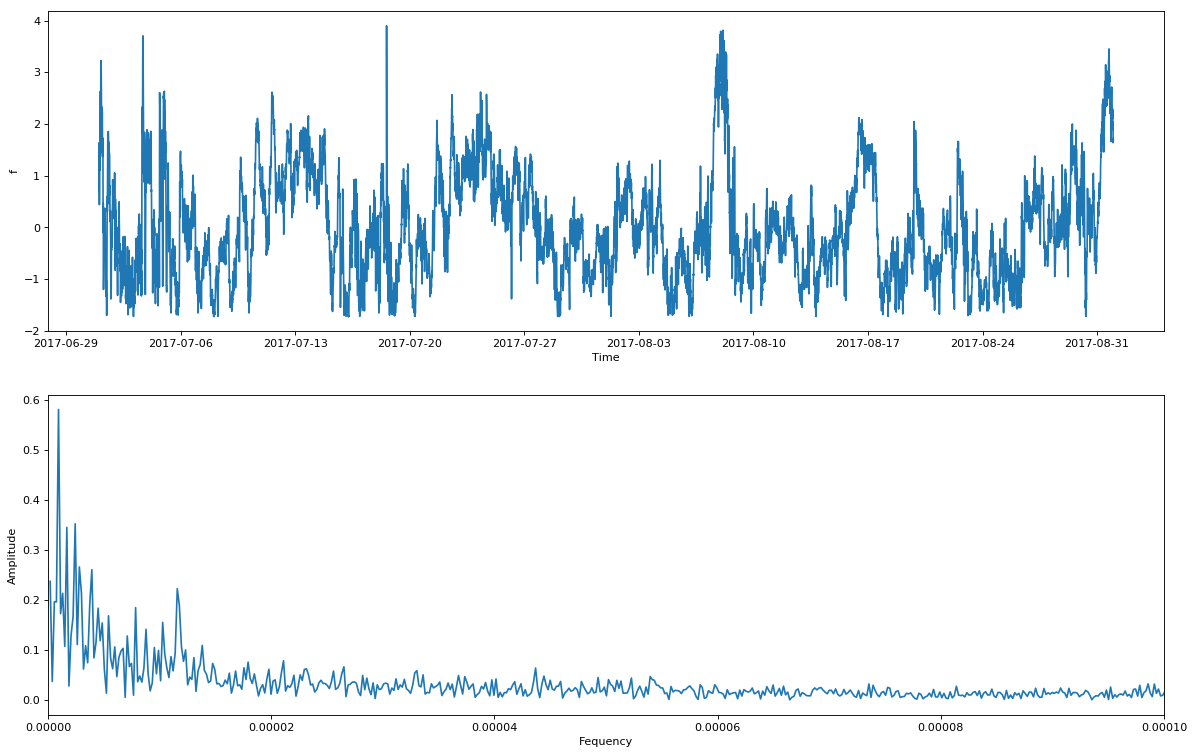

In [282]:
samplingPeriod = 600
plot_fft(data_hiratsuka, "vel", samplingPeriod)

mu: 3.098928320381158, sig: 1.63261459916804


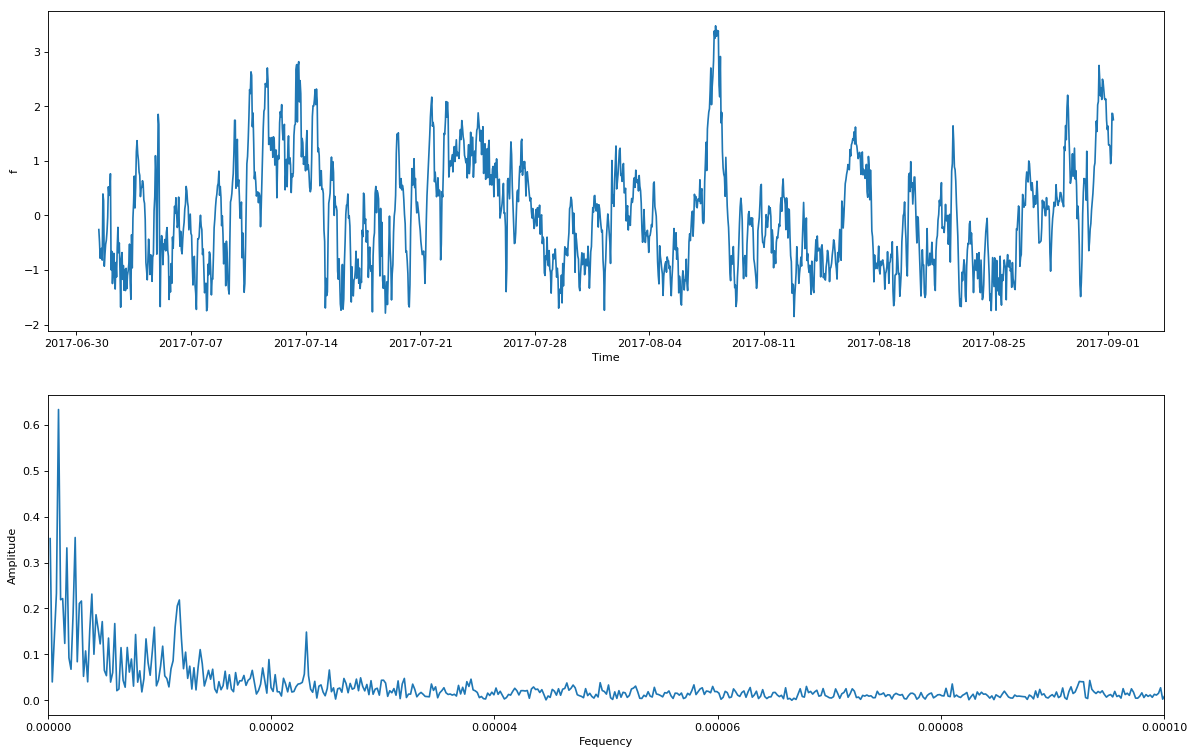

In [283]:
samplingPeriod = 3600
plot_fft(data_msm, "vel_1", samplingPeriod)

mu: 4.467400497685188, sig: 2.8993193883858592
mu: 2.723982180155159, sig: 1.4330884259446157


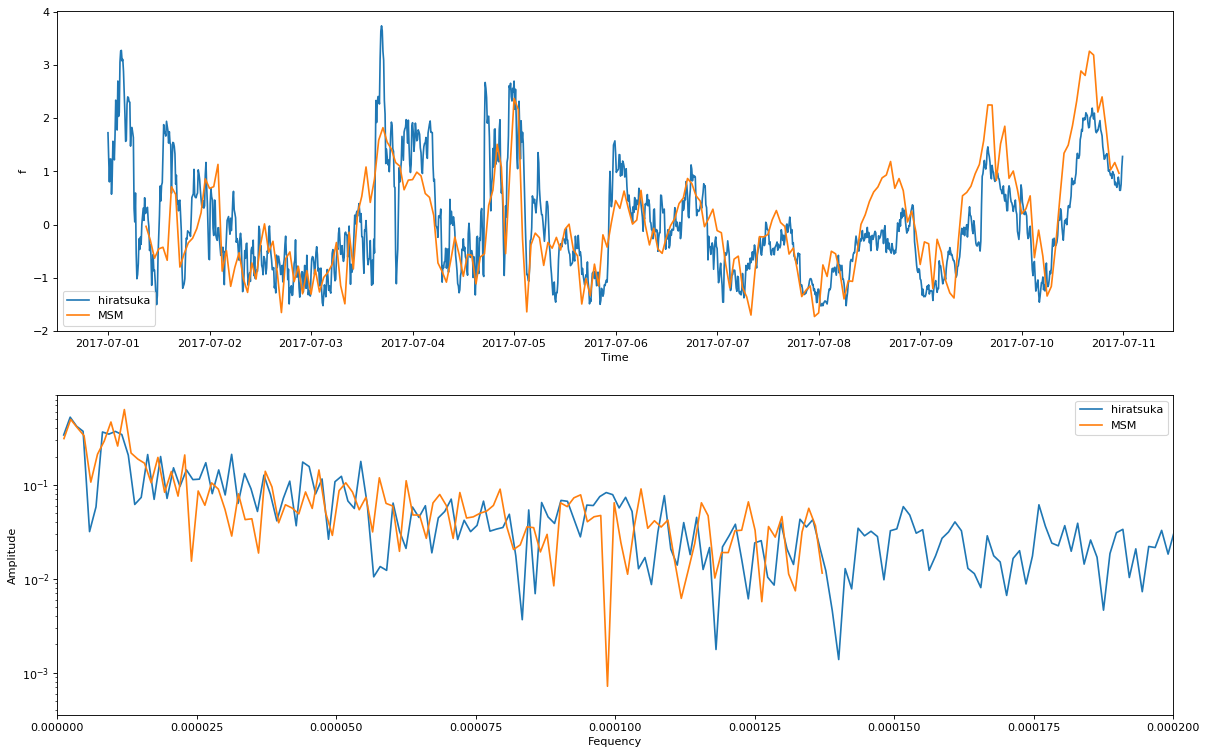

mu: 5.301511284722226, sig: 2.850107017765637
mu: 3.603924599471065, sig: 1.8508397689809828


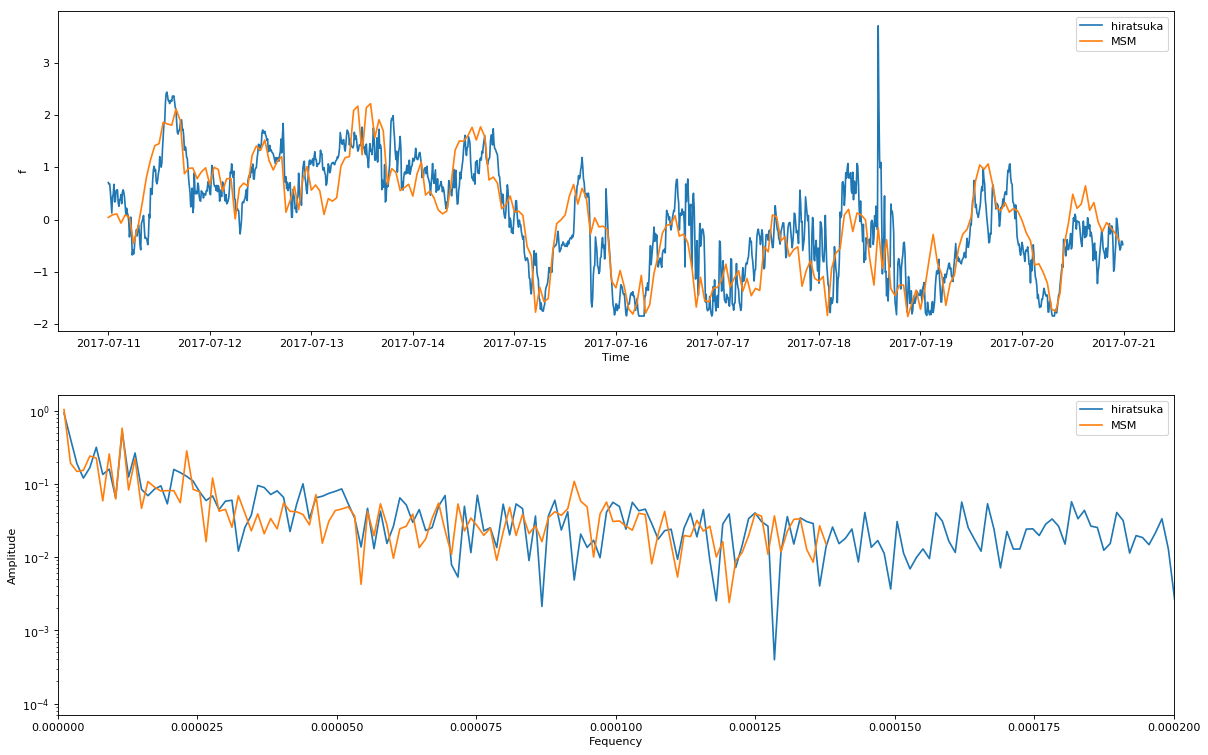

mu: 5.904452638888888, sig: 2.526947504845208
mu: 3.640522143651416, sig: 1.4906833669472723


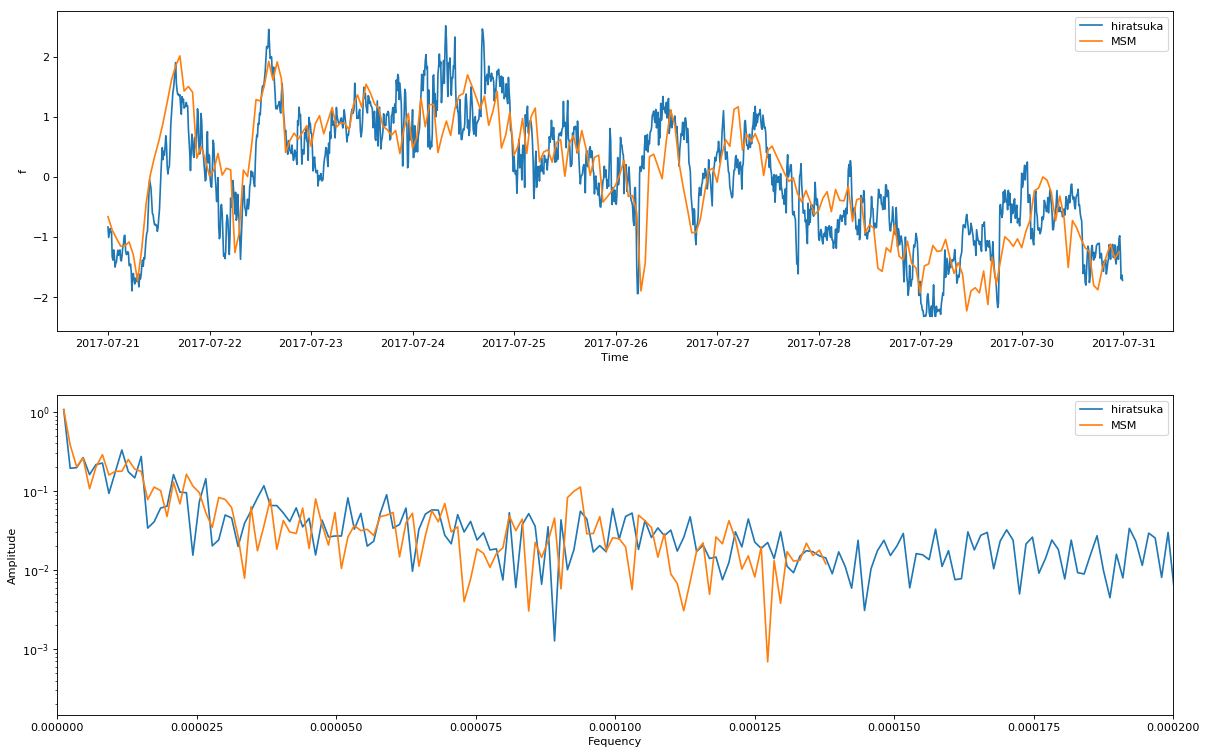

mu: 4.7346650925925875, sig: 3.0709215002252557
mu: 3.1128609838355326, sig: 1.7570473518534775


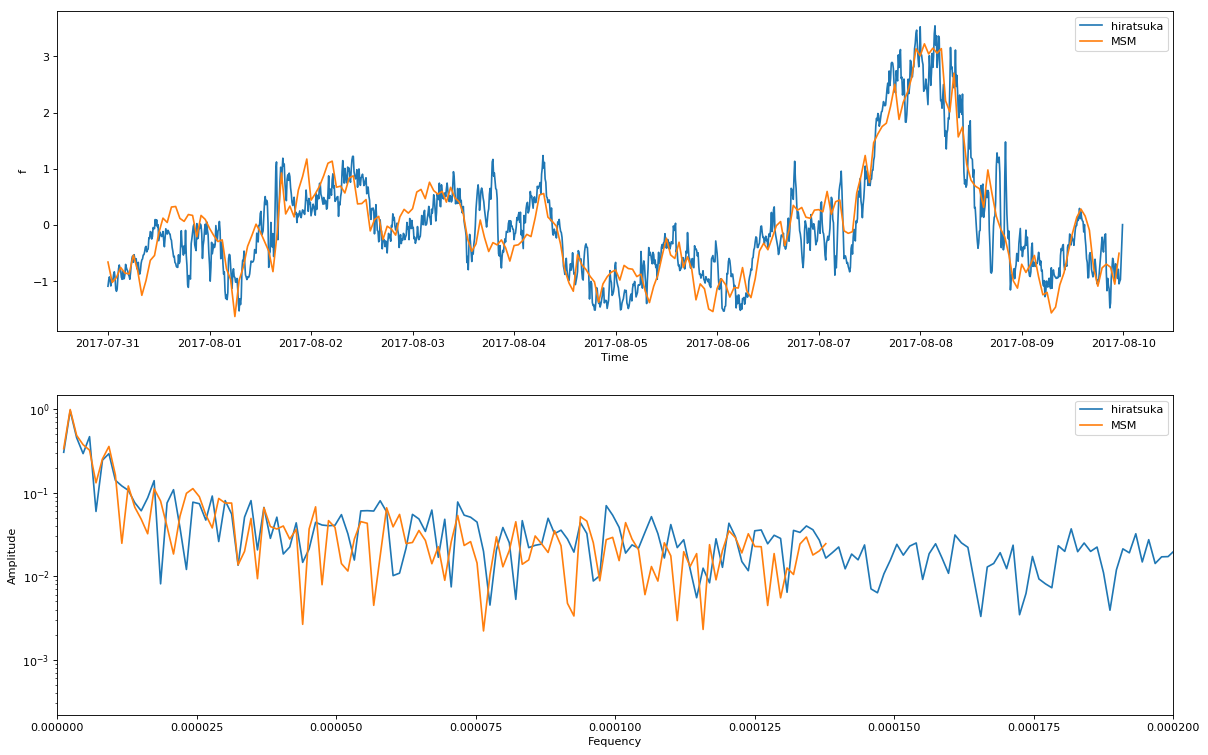

mu: 4.320051631944443, sig: 2.375455271324687
mu: 2.545884045710997, sig: 1.245180153355105


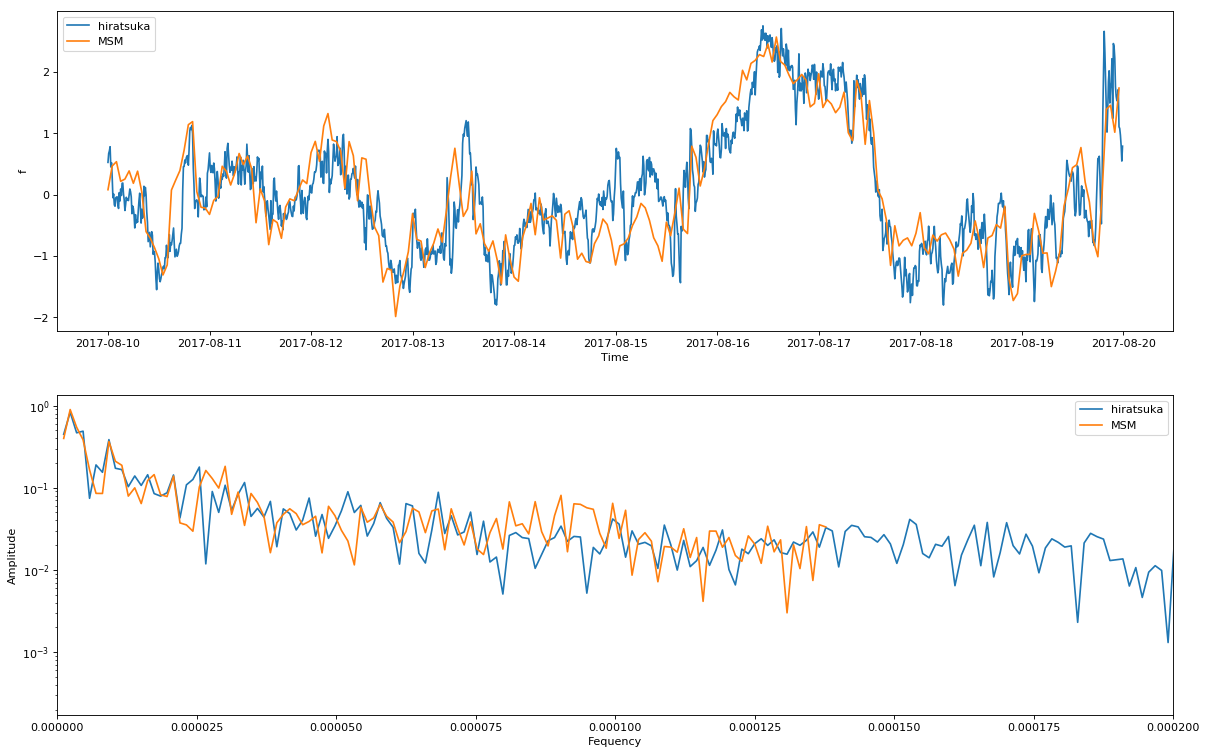

mu: 4.06779554398148, sig: 2.179519013571849
mu: 2.5904691159213056, sig: 1.3374153988138309


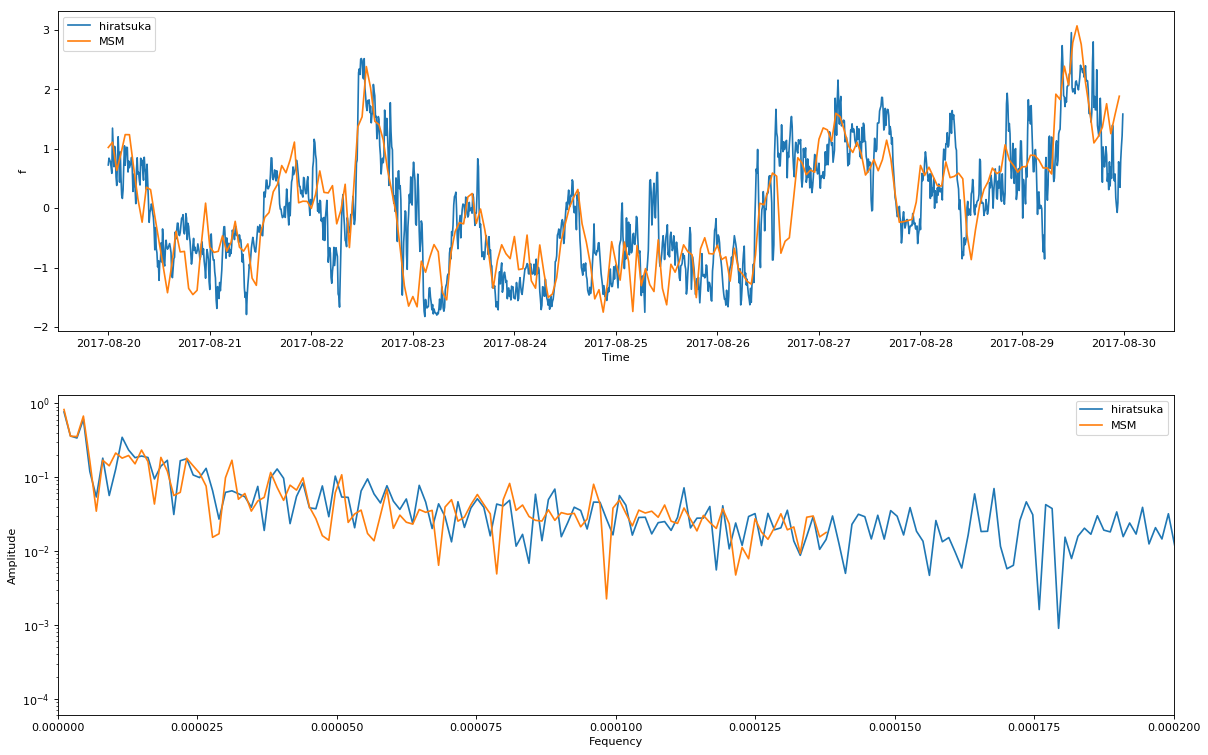

In [259]:
delta = 10
start = datetime(2017,7,1,0,0,0)
end = start + timedelta(days=delta)

while end < datetime(2017,9,1,0,0,0):
    data_1 = data_hiratsuka.query('time >= \"{0}\" & time < \"{1}\"'.format(start, end))
    data_2 = data_msm.query('time >= \"{0}\" & time < \"{1}\"'.format(start, end))

    plot_2_fft(data_1, "vel", "hiratsuka", 600,  data_2, "vel_1", "MSM", 3600, "fft_2017_10days_{0}_{1}".format(start.strftime("%Y%m%d"), end.strftime("%Y%m%d")))
    
    start = start + timedelta(days=delta)
    end = start + timedelta(days=delta)

mu: 4.79931278163581, sig: 2.740635701106707
mu: 3.038237943310634, sig: 1.5981590937645922


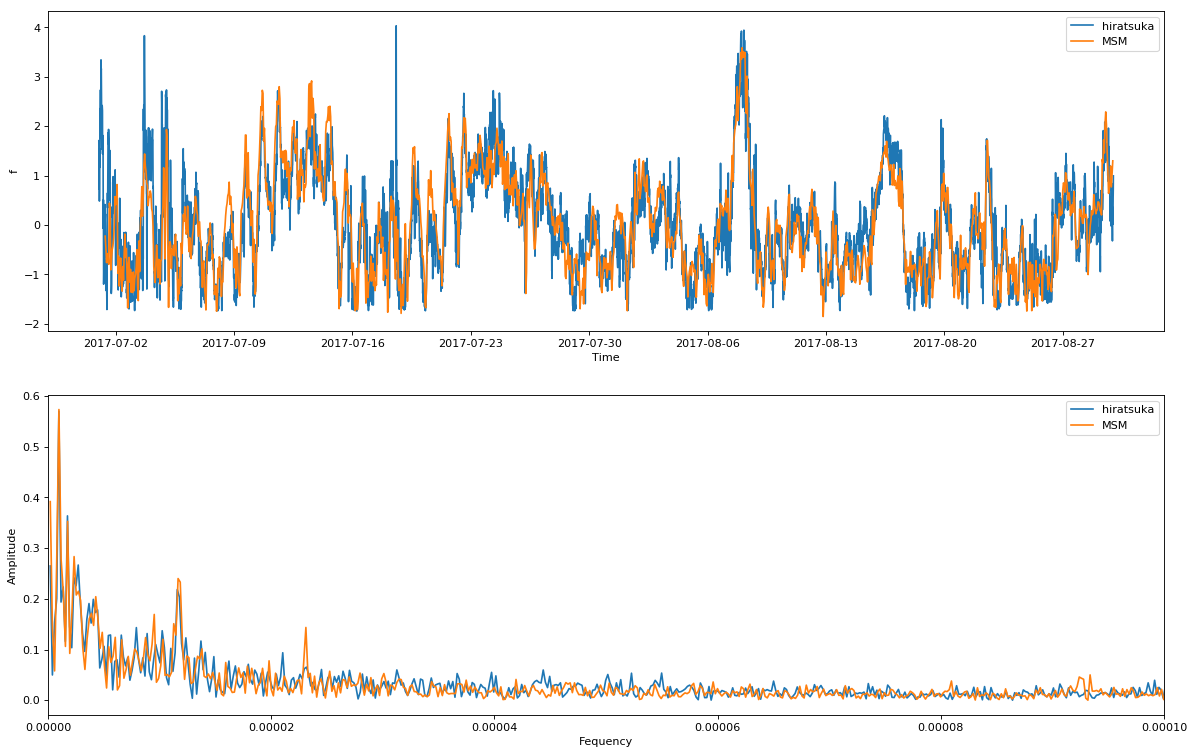

In [286]:
delta = 60
start = datetime(2017,7,1,0,0,0)
end = start + timedelta(days=delta)

while end < datetime(2017,9,1,0,0,0):
    data_1 = data_hiratsuka.query('time >= \"{0}\" & time < \"{1}\"'.format(start, end))
    data_2 = data_msm.query('time >= \"{0}\" & time < \"{1}\"'.format(start, end))

    plot_2_fft(data_1, "vel", "hiratsuka", 600,  data_2, "vel_1", "MSM", 3600, "fft_2017_60days")
    
    start = start + timedelta(days=delta)
    end = start + timedelta(days=delta)

In [7]:
# print(data_hiratsuka
data_msm

,time,vel_1,vel_2,vel_3,vel_4
0,2017-07-01 09:00:00,2.676430,1.932353,3.030541,2.239878
1,2017-07-01 10:00:00,2.306810,1.672683,2.259050,1.604849
2,2017-07-01 11:00:00,1.817453,1.191578,1.932844,1.224083
3,2017-07-01 12:00:00,2.070287,1.613360,1.995605,1.558370
4,2017-07-01 13:00:00,2.113657,1.898450,2.035530,1.738829
5,2017-07-01 14:00:00,1.762252,1.499846,1.894849,1.039611
6,2017-07-01 15:00:00,3.743077,2.971264,3.995252,3.140068
7,2017-07-01 16:00:00,3.537955,2.162221,3.239197,1.891215
8,2017-07-01 17:00:00,1.579353,0.735356,1.685615,0.730604
9,2017-07-01 18:00:00,1.936639,1.511702,1.847129,1.351280


In [7]:
data_msm_amp = pd.concat([data_msm, data_msm, data_msm, data_msm, data_msm, data_msm]).sort_values(by="time")

[[ 1.          0.83368856]
 [ 0.83368856  1.        ]]


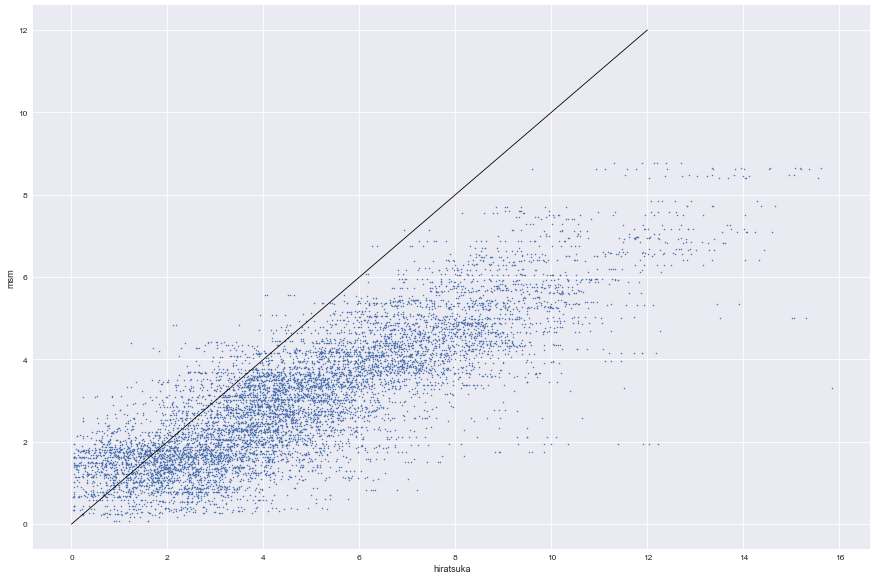

In [19]:
start = datetime(2017,7,1,9,0,0)
end = start + timedelta(days=62) + timedelta(hours=-9)

data_1 = data_hiratsuka.query('time >= \"{0}\" & time < \"{1}\"'.format(start, end))["vel"]
data_2 = data_msm_amp.query('time >= \"{0}\" & time < \"{1}\"'.format(start, end))["vel_1"]

plt.figure(figsize=(18, 12), dpi=60)

plt.subplot(1,1,1)
plt.scatter(data_1, data_2, s=2)
corr = np.corrcoef(data_1, data_2)
print(corr)

x = np.linspace(0,12)  # xの値域(0, 1, 2, 3)
y = x              # 直線の式
plt.plot(x, y, "r-", lw=1, c="black")      # 直線を引く

# plt.title('vel plot')
plt.xlabel('hiratsuka')
plt.ylabel('msm')

plt.savefig("images/scatter/scatter.png")
plt.show()

In [29]:
%matplotlib inline
data = pd.DataFrame()
data["hiratsuka"] = np.array(data_1)
data["msm"] = np.array(data_2)

y = 0.4847624970707646*x + 0.723273810829856


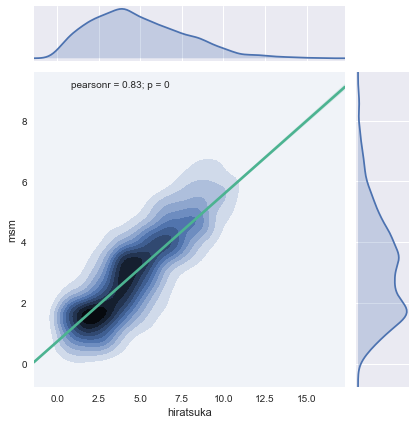

In [72]:
g = sns.jointplot("hiratsuka", "msm", data, kind="kde")
# sns.regplot(x="hiratsuka", y="msm", data=data)
# g = sns.kdeplot(data[data.columns[0]], data[data.columns[1]], shade=True)

g.plot_joint(sns.regplot, data=data, scatter=False, color="#4CB391")
# g.patch.set_facecolor('white')
# g.collections[0].set_alpha(0)
# ax.set_xlabel('$Y_1$', fontsize = 15)
# ax.set_ylabel('$Y_0$', fontsize = 15)
# plt.xlim(-3, 3)
# plt.ylim(-3, 3)
# g.plot_joint(plt.plot, [-3,3], color="#888888", linewidth=0.3)
# plt.show()

# axes = g.axes
# axes[0,0].set_ylim(0,)
# axes[0,1].set_ylim(0,)

a, b = np.polyfit(data["hiratsuka"], data["msm"], 1)
print("y = {0}*x + {1}".format(a, b))

In [228]:
start = datetime(2017,7,1,9,0,0)
end = start + timedelta(days=62) + timedelta(hours=-9)
# print(start, end)

data_1 = np.array(data_hiratsuka.query('time >= \"{0}\" & time < \"{1}\"'.format(start, end))["vel"])
data_2 = np.array(data_msm_amp.query('time >= \"{0}\" & time < \"{1}\"'.format(start, end))["vel_1"])

d = data_2 - data_1
# print(d.shape)

diff = pd.DataFrame(columns=["time"])
diff["time"] = pd.date_range('2017-07-01 09:00:00', periods=8874 ,freq='10min')
diff["diff"] = d
diff

,time,diff
0,2017-07-01 09:00:00,-2.448620
1,2017-07-01 09:10:00,-2.666820
2,2017-07-01 09:20:00,-2.732087
3,2017-07-01 09:30:00,-2.042753
4,2017-07-01 09:40:00,-1.680437
5,2017-07-01 09:50:00,-0.377970
6,2017-07-01 10:00:00,-1.069724
7,2017-07-01 10:10:00,-0.455040
8,2017-07-01 10:20:00,1.150976
9,2017-07-01 10:30:00,-0.012457


mu: -1.7864222595495196, sig: 1.6977965716914636


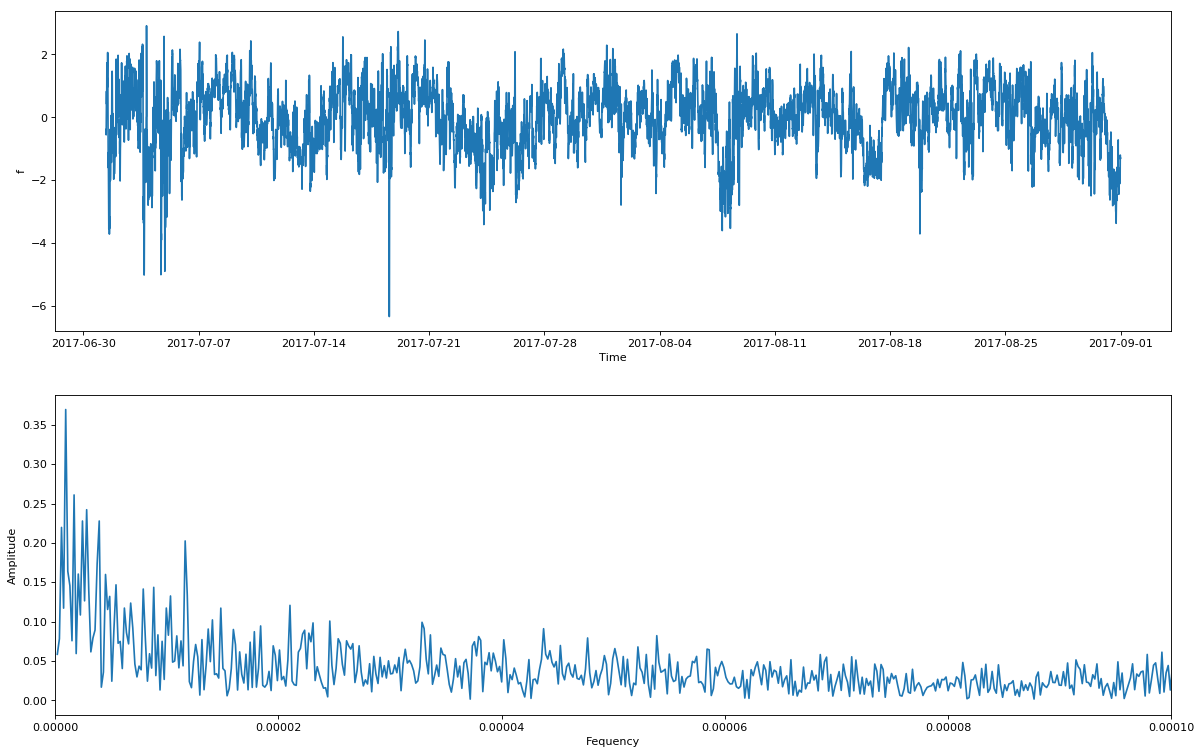

In [284]:
samplingPeriod = 600
plot_fft(diff, "diff", samplingPeriod)

mu: -1.5954430964201178, sig: 2.0488374202417177


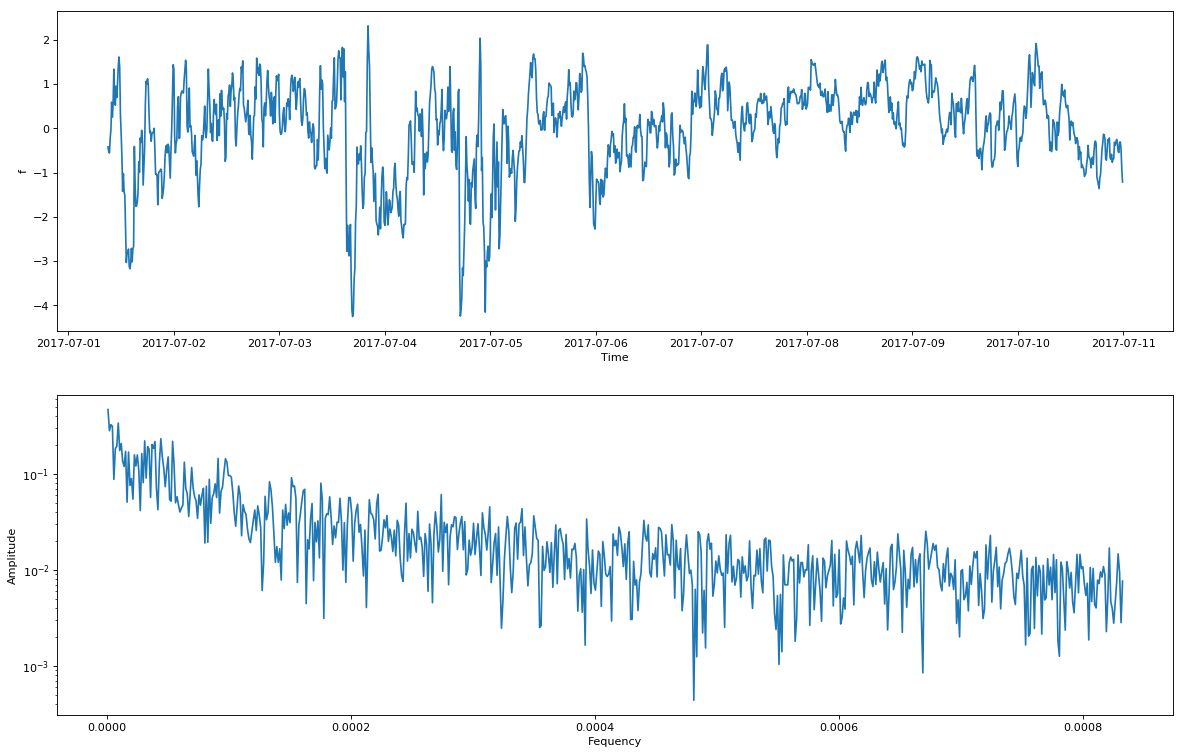

mu: -1.6975866852511543, sig: 1.630286048183378


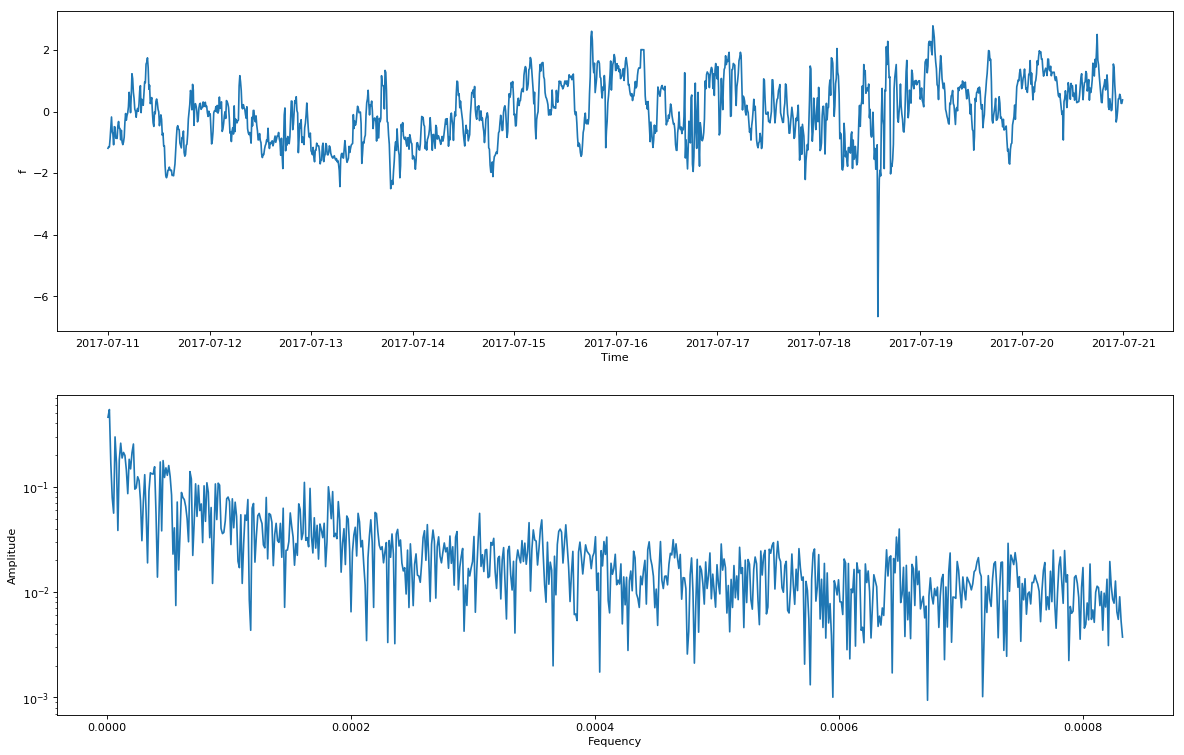

mu: -2.263930495237474, sig: 1.5730193378069712


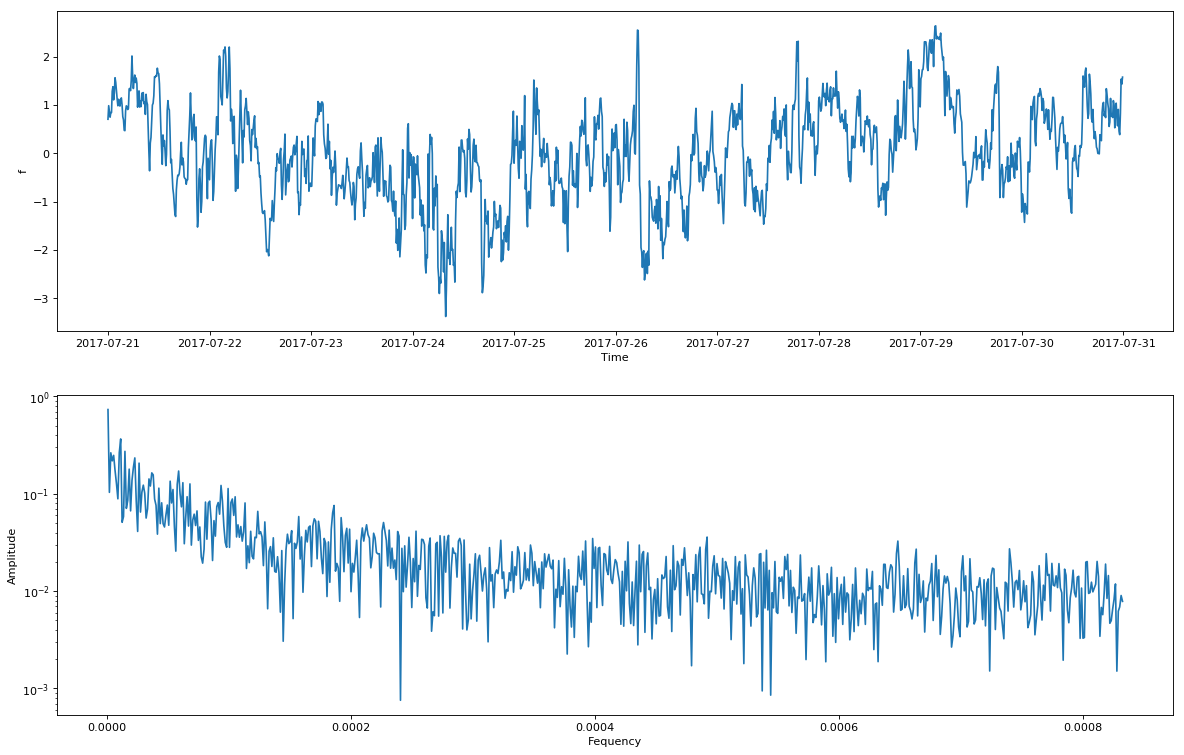

mu: -1.621804108757056, sig: 1.7103119834516436


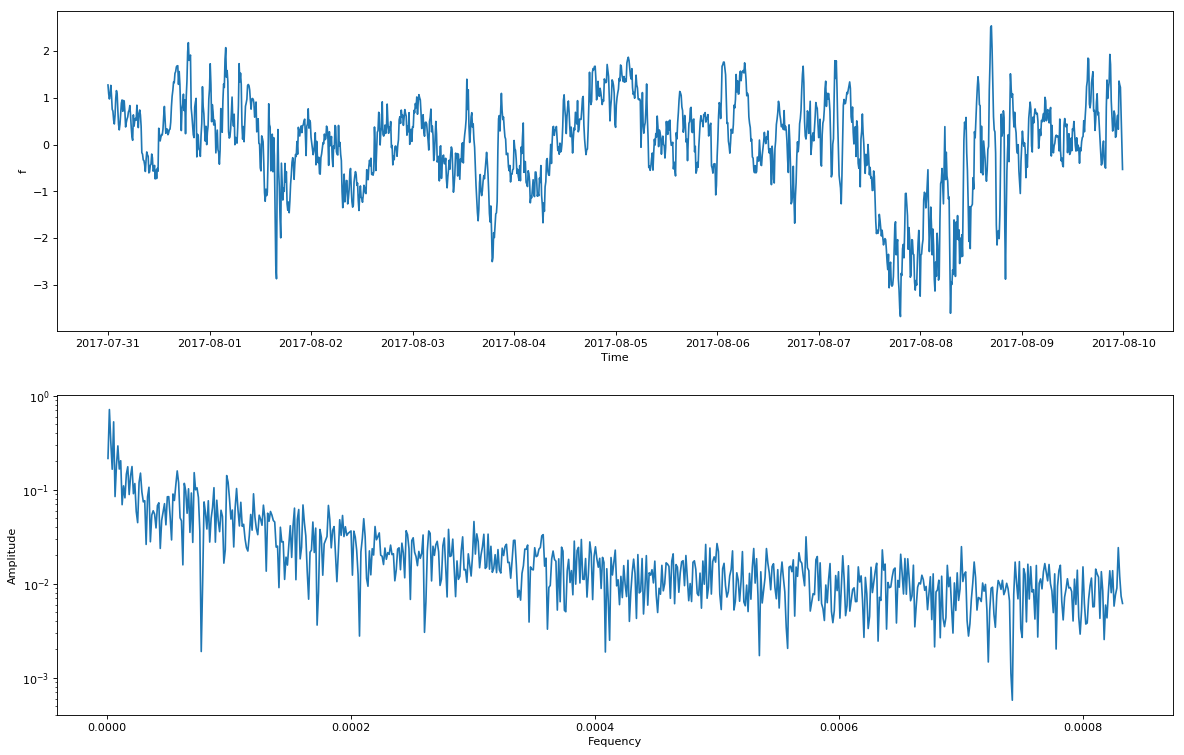

mu: -1.7741675862334452, sig: 1.4931071584759494


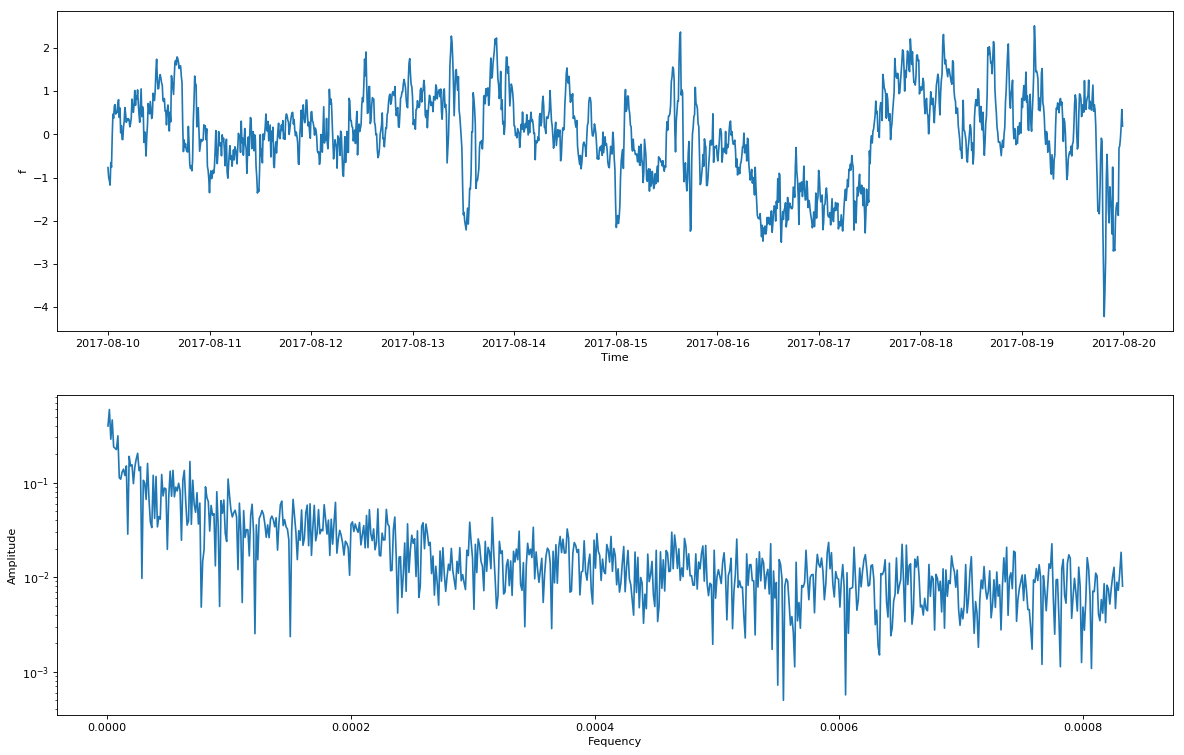

mu: -1.4773264280601761, sig: 1.3811086029125053


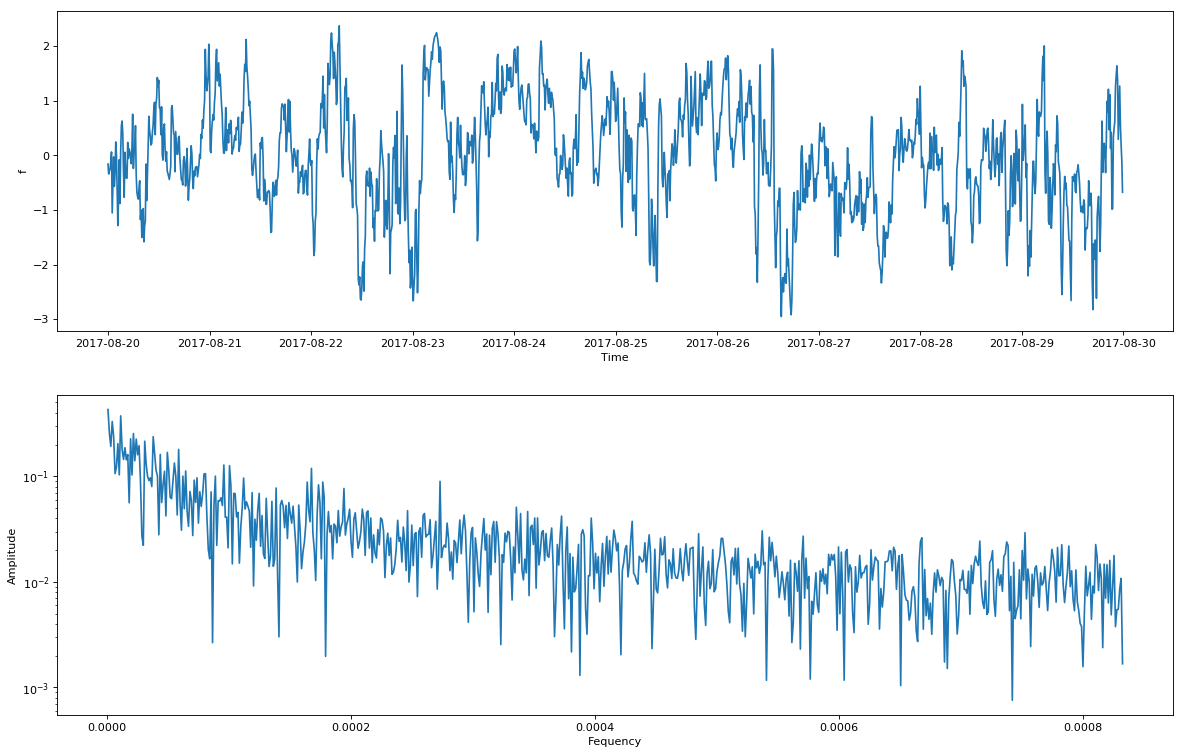

In [274]:
delta = 10
start = datetime(2017,7,1,0,0,0)
end = start + timedelta(days=delta)

while end < datetime(2017,9,1,0,0,0):
    data = diff.query('time >= \"{0}\" & time < \"{1}\"'.format(start, end))

    plot_fft(data, "diff", 600, "diff_2017_10days_{0}_{1}".format(start.strftime("%Y%m%d"), end.strftime("%Y%m%d")))
    
    start = start + timedelta(days=delta)
    end = start + timedelta(days=delta)